# Creating Customer Segments Using Unsupervised Machine Learning

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

This Dataset, I received from https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

In [2]:
# Read data
Data=pd.read_csv('Wholesale customers data.csv')

In [3]:
df=Data.copy()

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


#### Attribute Information:

1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/Cafa) or Retail channel (Nominal)
8) REGION: customers Region  Lisnon, Oporto or Other (Nominal)

#### Descriptive Statistics:

(Minimum, Maximum, Mean, Std. Deviation)
* FRESH ( 3, 112151, 12000.30, 12647.329)
* MILK (55, 73498, 5796.27, 7380.377)
* GROCERY (3, 92780, 7951.28, 9503.163)
* FROZEN (25, 60869, 3071.93, 4854.673)
* DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854)
* DELICATESSEN (3, 47943, 1524.87, 2820.106)

REGION Frequency
* Lisbon 77
* Oporto 47
* Other Region 316
* Total 440

CHANNEL Frequency
* Horeca 298
* Retail 142
Total 440

For the purposes of this project, 'Channel' and 'Region' features will be excluded from data and focused on six product

In [7]:
df.drop(['Channel','Region'],inplace=True,axis=1)

In [8]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [9]:
# checking size and shape of dataset
print('Shape =',df.shape)
print('size =',df.size)

Shape = (440, 6)
size = 2640


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [11]:
# checking null value
df.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [12]:
# description of the dataset
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


The mean values are as follows:
* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

### Visualize Feature Distributions

#### univariate analysis

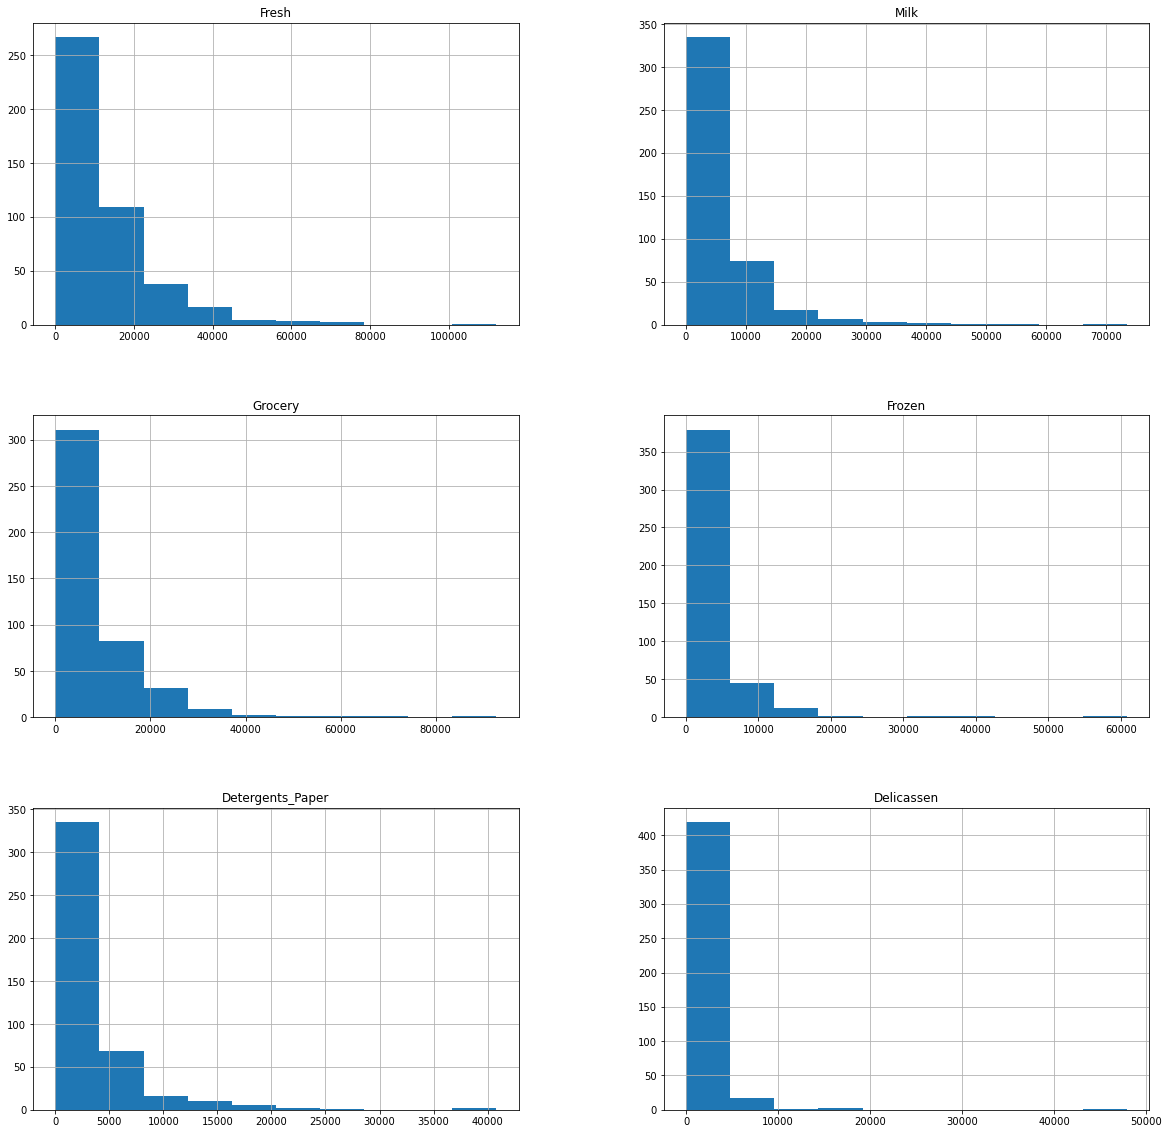

In [13]:
# hist plot
df.hist(figsize=(20,20));

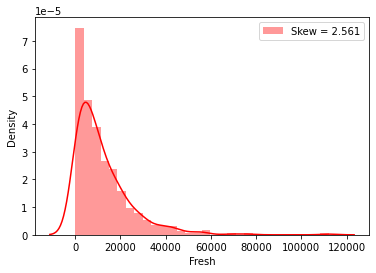

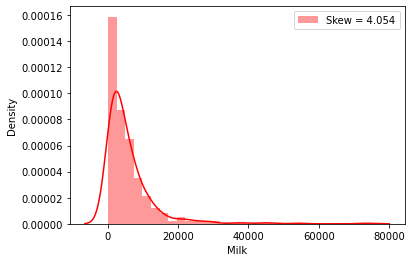

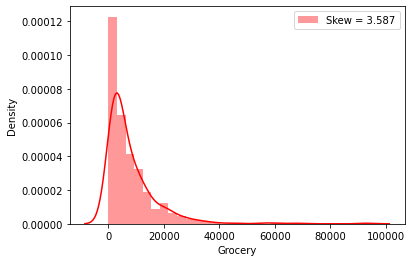

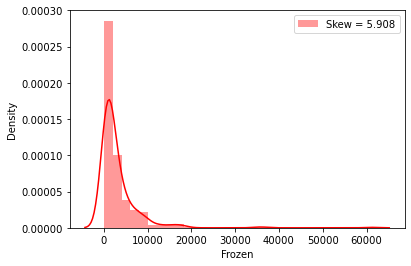

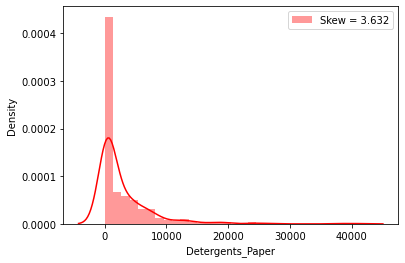

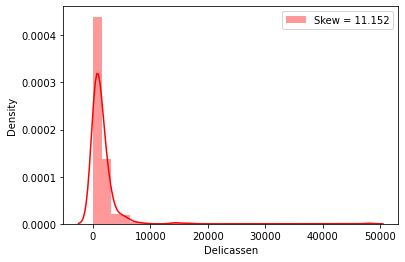

In [14]:
a=[cols for cols in df.columns if df[cols].dtypes != 'O']
for i in a:
    skew = df[i].skew()
    sns.distplot(df[i], kde= True, label='Skew = %.3f' %(skew), bins=30,color='r')
    plt.legend(loc='best')
    plt.show();

#### Bivariate analysis

In [15]:
# heatmap for understanding correlation

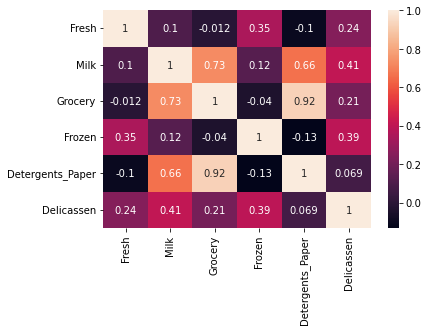

In [16]:
sns.heatmap(df.corr(),annot=True);

To get a better understanding of the dataset, we can construct a pairplotof each of the six product features present in the data. 

<Figure size 1440x1440 with 0 Axes>

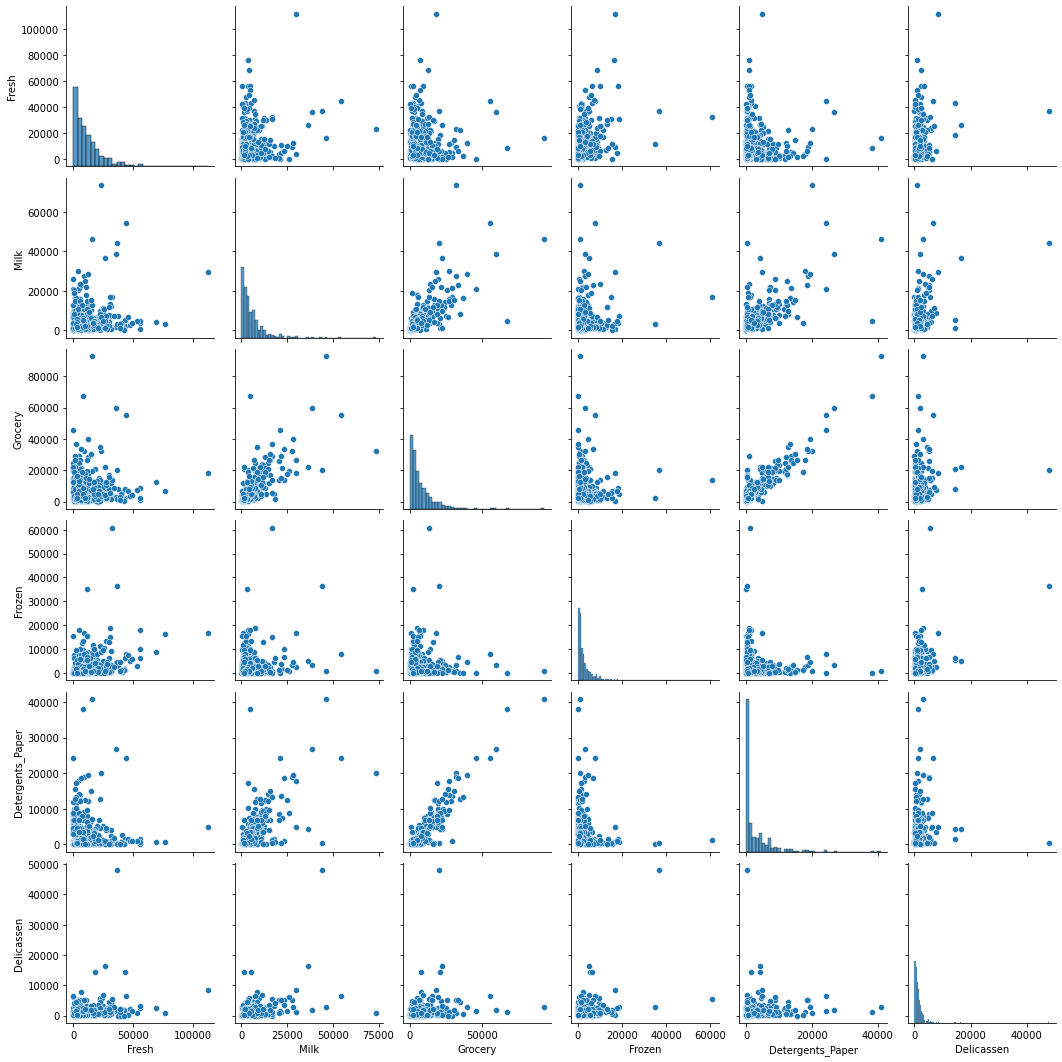

In [17]:
#pairplot
plt.figure(figsize=(20,20))
sns.pairplot(df);

Using the pairplot, we can discuss the following:

* Data is not normally distributed, it is positively skewed and they resemeble the log-normal distribution.

* In most plots, most data points lie near the origin which shows little correlation between them.

* From the Pair plots and the heatmap of correlation, we can see that there is a strong corr between the 'Grocery' and 'Detergent_paper' features. The features 'Grocery' and 'Milk' also show a good degree of correlation.


#### Handling Outlier

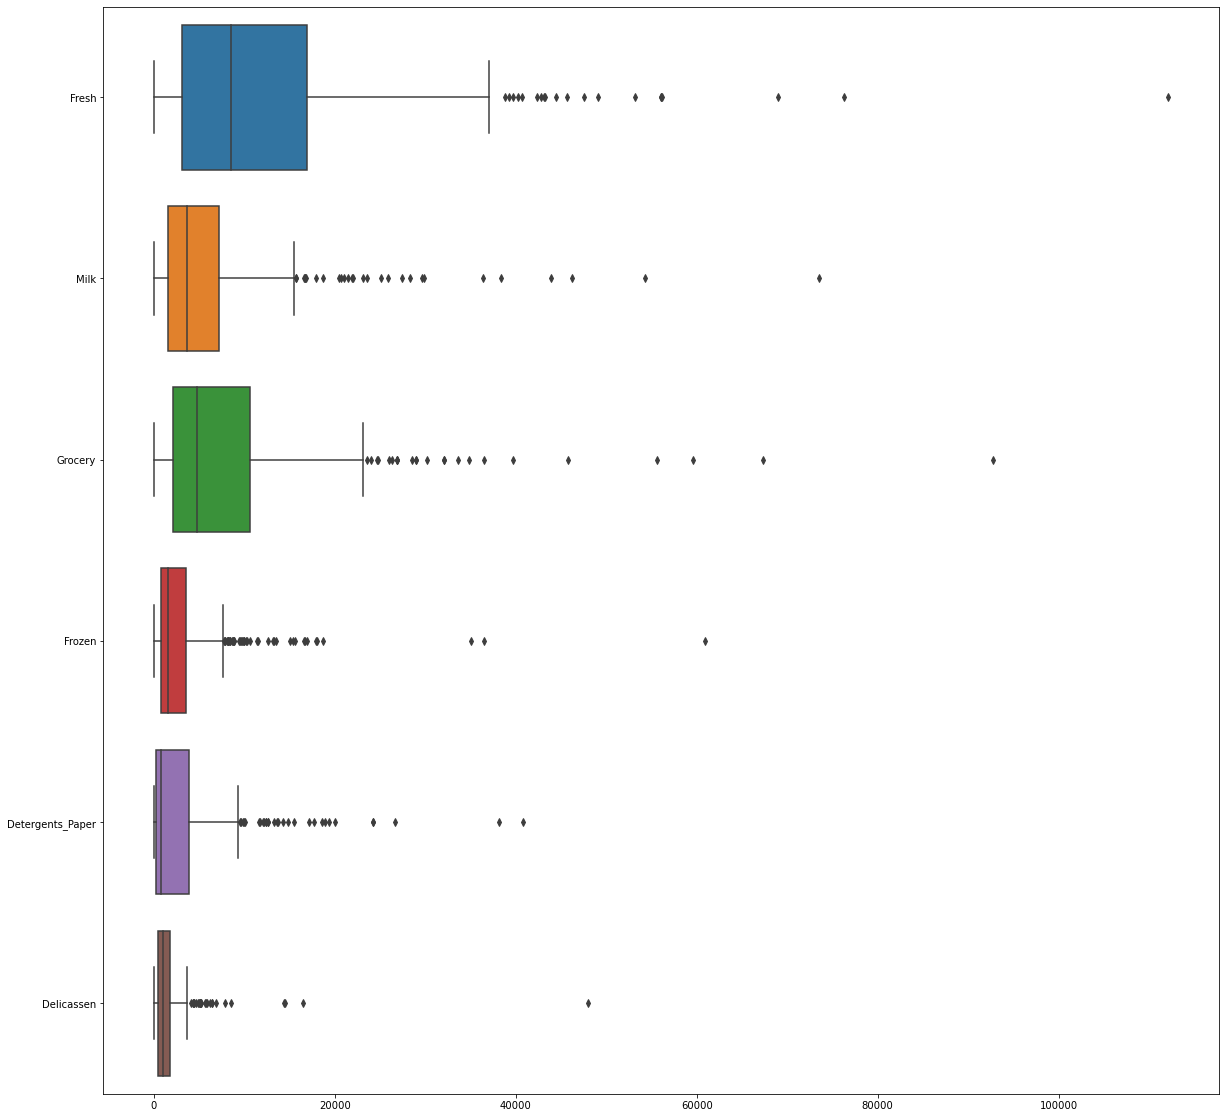

In [18]:
# Outlier
plt.figure(figsize=(20,20))
sns.boxplot(data=df, orient="h");

In [19]:
# handling outlier
# Handling Outlier
for colname,colvals in df.iteritems():
    if df[colname].dtype!=object:
        Q1=df[colname].quantile(q=0.25)
        Q3=df[colname].quantile(q=0.75)
        IQR=Q3-Q1
        low=Q1-(1.5*IQR)
        up=Q3+(1.5*IQR)
        df.loc[(df[colname]<low) | (df[colname]>up) ,colname]=df[colname].median()
    else:
        continue

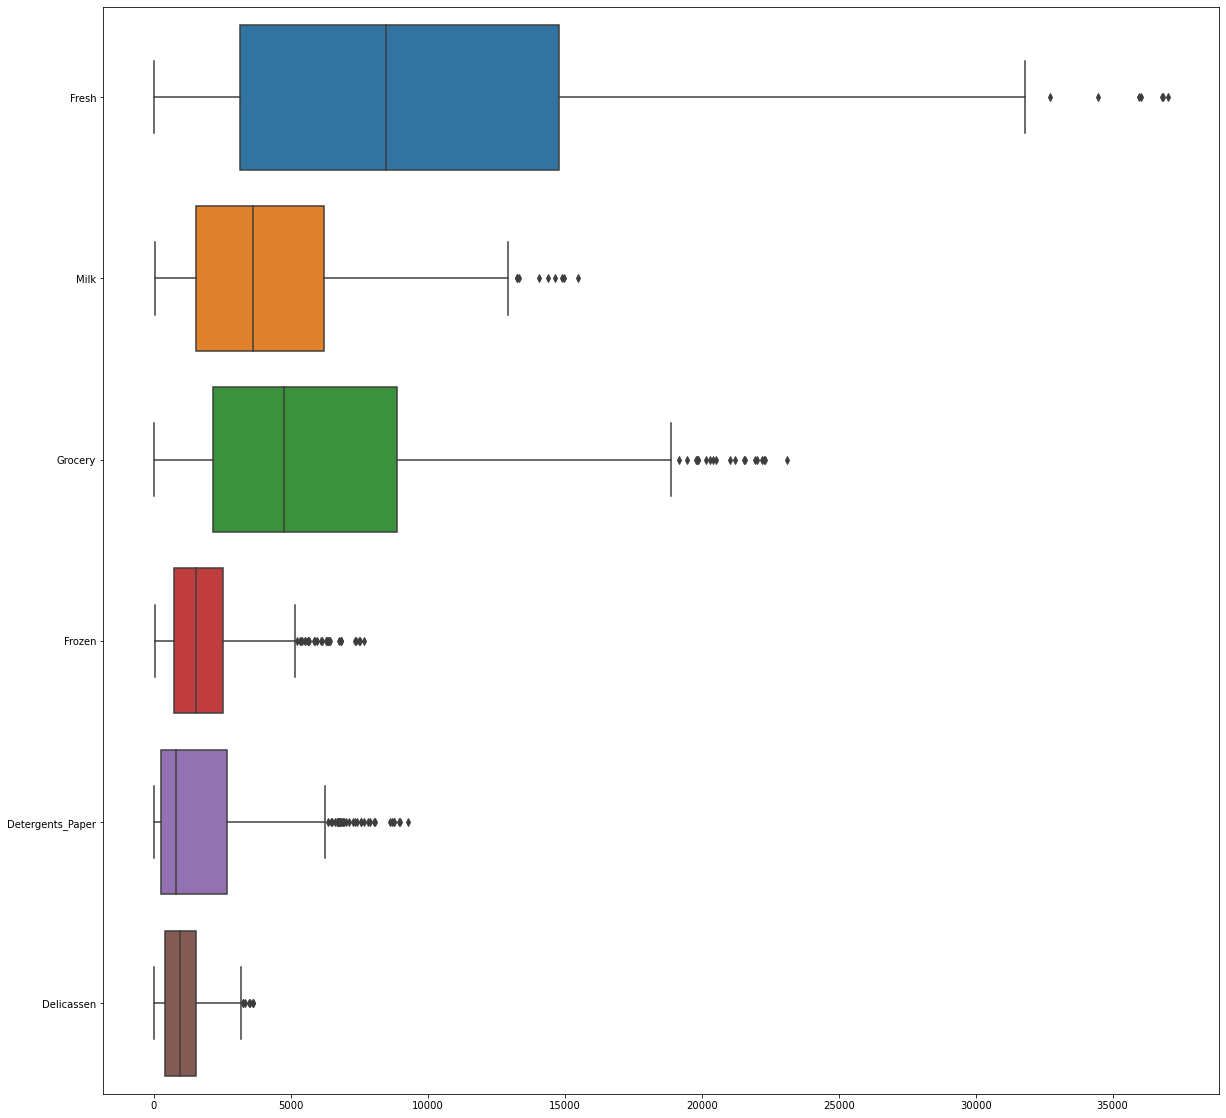

In [20]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df, orient="h");

#### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data.

In [21]:
# Scale the data using the natural logarithm
log_df = np.log(df)

## Implementation: PCA

#### Perform dimensionality reduction using PCA such that the 95% of the variance is explained

In [22]:
# import library
from sklearn.decomposition import PCA 

In [23]:
pca=PCA()
data_after_pca_transformation=pca.fit_transform(log_df)

In [24]:
pca.explained_variance_ratio_

array([0.41613864, 0.2706215 , 0.12459668, 0.10252488, 0.05553057,
       0.03058772])

In [25]:
list(pca.explained_variance_ratio_)

[0.41613864417130775,
 0.2706214969801295,
 0.12459667562393462,
 0.10252488473041055,
 0.055530574661037765,
 0.03058772383318003]

In [26]:
pca.explained_variance_ratio_.sum()

1.0000000000000002

#### Here sum of the value is equal to one. so we are on right track.
IN ANY MODEL THERE ALWAYS BE ERROR(AROUND 5 TO 10%)

WE CAN SELECT THOSE NUMBER OF PCAs WHICH ARE ABLE TO EXPLAIN AROUND 90 TO 95% OF THE VARIANCE.

AND WE CAN IGNORE REST OF THEM.

In [27]:
l1 = list(pca.explained_variance_ratio_)

In [28]:
np.sum(l1[0:5])

0.9694122761668201

In [29]:
pca = PCA(n_components = 5) 
principal_component = pca.fit_transform(log_df) 
principal_component = pd.DataFrame(principal_component) 
principal_component.columns = ['P1', 'P2' ,'P3', 'P4' , 'P5']
principal_component.head()

,P1,P2,P3,P4,P5
0,-1.870685,-0.750246,-0.303595,1.781942,0.029992
1,-1.924807,-1.212091,0.287678,-0.304274,0.191949
2,-1.740642,-0.905764,-0.150290,-0.756247,0.141102
3,1.004260,-1.491285,0.501769,-1.072585,-0.461206
4,-0.624831,-1.876216,-0.605914,-0.725660,0.173590


So,here we can see first 5 variables are able to explain almost 95% of the variance is able to explain.

#### Finding the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

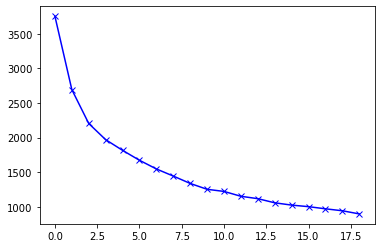

In [30]:
#optimal no. of clusters
n_clusters=20
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(principal_component)
    cost.append(kmean.inertia_)  
   
plt.plot(cost, 'bx-');

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
silhouette_scores = []

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

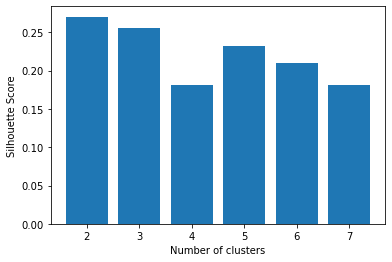

In [33]:
for n_cluster in range(2, 8):
    silhouette_scores.append(
        silhouette_score(principal_component, KMeans(n_clusters = n_cluster).fit_predict(data_after_pca_transformation))) 
    
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

The optimum value of k for kmeans clustering is 2

##### Implementation: Dimensionality Reduction

In [34]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(log_df)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(log_df)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# K-Means Clustering

In [35]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

scores = {}
for i in range(2,7):
    
    print('Number of clusters: ' + str(i))
        
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(random_state=42, n_components=i)
    clusterer.fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_
    print('Cluster Center: ' + str(centers))

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    scores[i] = score
    print('Silhouette score is: ' + str(score), '\n')
    
print('Scores: ' + str(scores))

Number of clusters: 2
Cluster Center: [[-1.02991079  1.54781746]
 [ 0.34990083 -0.5258539 ]]
Silhouette score is: 0.3946190242319091 

Number of clusters: 3
Cluster Center: [[-1.60565744 -0.48323982]
 [ 1.0797162  -0.37898221]
 [ 0.39052329  2.15687095]]
Silhouette score is: 0.3867931320291788 

Number of clusters: 4
Cluster Center: [[-2.52376038 -0.09348091]
 [ 0.90070921  0.77660172]
 [ 0.39904541  3.45743138]
 [ 0.41228389 -0.73194473]]
Silhouette score is: 0.28154322643859575 

Number of clusters: 5
Cluster Center: [[-1.71378586 -0.99766836]
 [ 1.31211844  0.74265192]
 [ 0.08933022  4.24371356]
 [ 0.90426064 -0.57670864]
 [-2.11985306  1.14912749]]
Silhouette score is: 0.31737639039915494 

Number of clusters: 6
Cluster Center: [[-2.1360704  -0.90686753]
 [ 2.64676888  1.43320209]
 [-0.95535091  4.69144973]
 [-0.22156741 -0.89555841]
 [-1.6417389   1.2832115 ]
 [ 1.48561398 -0.19563056]]
Silhouette score is: 0.335508744864742 

Scores: {2: 0.3946190242319091, 3: 0.3867931320291788,

The number of clusters with the best silhouette score is 2, with a 0.3946 score.

Once we choose the optimal number of clusters for your clustering algorithm using the scoring metric above, we can now visualize the results below

In [36]:
# Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(random_state=42, n_components=2)
clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_
print('Cluster Center: ' + str(centers))

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
scores[i] = score
print('Silhouette score is: ' + str(score), '\n')

Cluster Center: [[-1.02991079  1.54781746]
 [ 0.34990083 -0.5258539 ]]
Silhouette score is: 0.3946190242319091 



In [37]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = df.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,1359.0,3392.0,5687.0,593.0,1293.0,361.0
Segment 1,9303.0,2845.0,3744.0,1547.0,596.0,872.0


Using optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot
* Applying K-Means with no. of clusters as 2 because it has maximum silhoutte score

In [38]:
from sklearn.cluster import KMeans

In [39]:
db_def = KMeans(n_clusters=2, init='k-means++').fit(principal_component) 
labels = db_def.labels_

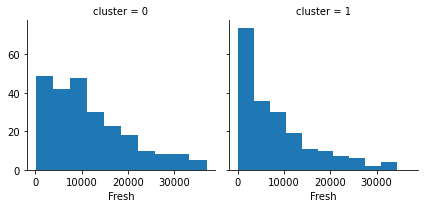

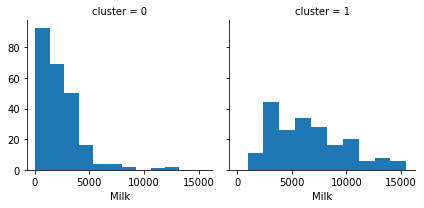

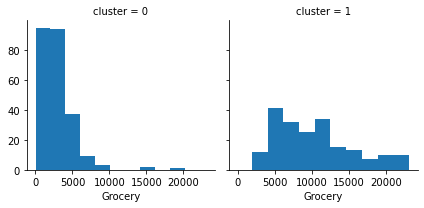

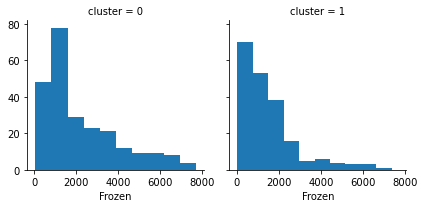

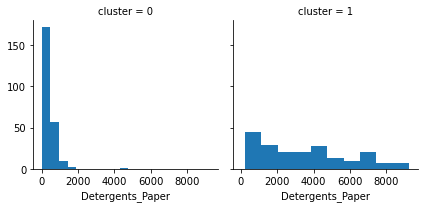

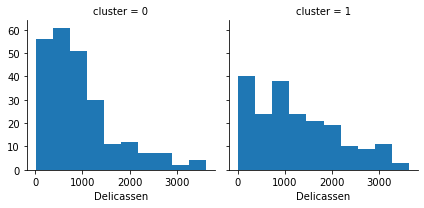

In [40]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

for cols in df:
    g = sns.FacetGrid(clusters, col = 'cluster')
    g.map(plt.hist, cols)

In [41]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,10033.079545,4281.829545,6218.863636,1896.656818,1806.022727,1084.296591
std,8450.546022,3402.380107,5339.702492,1674.915834,2257.986747,840.423787
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8489.500000,3623.500000,4754.750000,1521.500000,814.750000,964.750000
75%,14792.000000,6202.000000,8860.750000,2534.000000,2688.000000,1525.000000
max,37036.000000,15488.000000,23127.000000,7683.000000,9265.000000,3637.000000


## Observations
* Segment 0 may represent a supermarket as every feature except fresh and frozen are above the median.
* Segment 1 may represent a a fresh food market as every feature except Frozen and Fresh are below the median.


# Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail.

In [42]:
# Select three indices of your choice you wish to sample from the dataset
indices = [80,160,338]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(df.loc[indices], columns = df.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
samples

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,7005,829,3009.0,430,610.0,529.0
1,1725,3651,12822.0,824,4424.0,2157.0
2,3,333,7021.0,1526,15.0,550.0


In [43]:
# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

In [44]:
log_samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,8.854379,6.720220,8.009363,6.063785,6.413459,6.270988
1,7.452982,8.202756,9.458918,6.714171,8.394800,7.676474
2,1.098612,5.808142,8.856661,7.330405,2.708050,6.309918


In [45]:
# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

In [46]:
# Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(random_state=42, n_components=2)
clusterer.fit(reduced_data)

GaussianMixture(n_components=2, random_state=42)

In [47]:
# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
print('Sample predictions: ' + str(sample_preds))

Sample predictions: [1 1 0]


In [48]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


# Thank you